In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import yfinance as yf

# Define the start and end dates
start = '2010-01-01'
end = '2022-01-01'

# Retrieve the data
df = yf.download('AAPL', start=start, end=end)

# Display the first few rows of the dataframe
(df.head())

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473150,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,177.089996,180.419998,177.070007,180.330002,177.824432,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,176.798904,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,176.887665,62348900
2021-12-30,179.470001,180.570007,178.089996,178.199997,175.724060,59773000
2021-12-31,178.089996,179.229996,177.259995,177.570007,175.102814,64062300


In [4]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473150,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [5]:
print("Columns in the DataFrame:", df.columns)

Columns in the DataFrame: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [6]:
df =df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


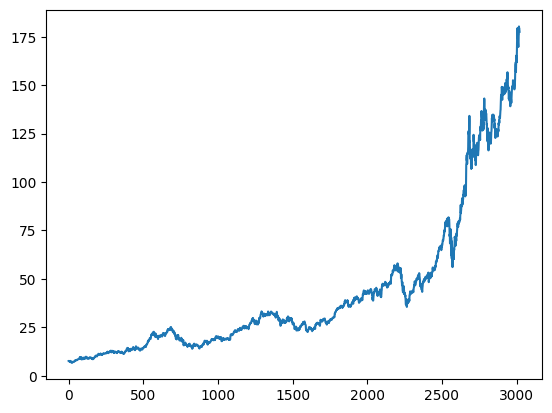

In [7]:
plt.plot(df.Close)

In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3016    153.3444
3017    153.6667
3018    153.9991
3019    154.3202
3020    154.6399
Name: Close, Length: 3021, dtype: float64

In [9]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3016    142.85570
3017    143.13220
3018    143.40125
3019    143.66845
3020    143.95365
Name: Close, Length: 3021, dtype: float64

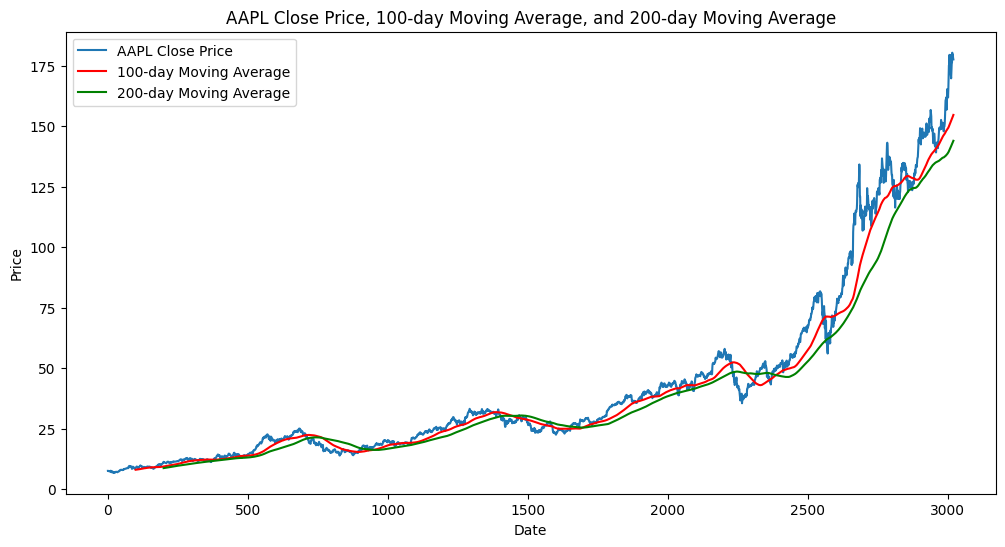

In [10]:
ma100 = df['Close'].rolling(100).mean()
ma200 = df['Close'].rolling(200).mean()

# Plotting
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='AAPL Close Price')  # Plot the 'Close' prices
plt.plot(ma100, 'r', label='100-day Moving Average')  # Plot the 100-day moving average in red
plt.plot(ma200, 'g', label='200-day Moving Average')  # Plot the 200-day moving average in green
plt.legend()  # Display legend
plt.title('AAPL Close Price, 100-day Moving Average, and 200-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [11]:
df.shape

(3021, 5)

In [12]:
df


,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3016,177.089996,180.419998,177.070007,180.330002,74919600
3017,180.160004,181.330002,178.529999,179.289993,79144300
3018,179.330002,180.630005,178.139999,179.380005,62348900
3019,179.470001,180.570007,178.089996,178.199997,59773000


In [13]:
train, test = df[['Close']][:int(len(df)*0.7)], df[['Close']][int(len(df)*0.7):]


In [14]:
train.shape

(2114, 1)

In [15]:
test.shape

(907, 1)

In [16]:
train

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
2109,46.907501
2110,46.790001
2111,47.090000
2112,47.037498


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0,1))
#fit transform train for lstm
train_scaled = scaler.fit_transform(train)


In [18]:
train_scaled

array([[0.0192931 ],
       [0.01961817],
       [0.01662229],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [19]:
x_train=[]
y_train=[]

for i in range(100,train_scaled.shape[0]):
    x_train.append(train_scaled[i-100:i])
    y_train.append(train_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [20]:
x_train

array([[[0.0192931 ],
        [0.01961817],
        [0.01662229],
        ...,
        [0.04806583],
        [0.04671287],
        [0.04573766]],

       [[0.01961817],
        [0.01662229],
        [0.01627964],
        ...,
        [0.04671287],
        [0.04573766],
        [0.05385553]],

       [[0.01662229],
        [0.01627964],
        [0.01750962],
        ...,
        [0.04573766],
        [0.05385553],
        [0.05695685]],

       ...,

       [[0.88339795],
        [0.8720206 ],
        [0.89065479],
        ...,
        [0.9770609 ],
        [0.98517881],
        [0.98228835]],

       [[0.8720206 ],
        [0.89065479],
        [0.8904703 ],
        ...,
        [0.98517881],
        [0.98228835],
        [0.98966821]],

       [[0.89065479],
        [0.8904703 ],
        [0.89539024],
        ...,
        [0.98228835],
        [0.98966821],
        [0.98837669]]])

In [21]:
y_train

array([0.05385553, 0.05695685, 0.06042715, ..., 0.98966821, 0.98837669,
       0.9910212 ])

In [22]:
x_train.shape

(2014, 100, 1)

In [23]:
#making ml model now with xtrain and y train and neural network with lstm

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization,Flatten, Input

In [25]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0866
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 0.0081
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0071
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0055
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0056
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.0054
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0047
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0051
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0052
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0043
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.0041
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0033
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0038
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0040
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0039
Epo

In [27]:
model.save('my_model.keras')

In [28]:
test.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [29]:
train.tail(100)

,Close
2014,43.057499
2015,43.257500
2016,43.750000
2017,43.587502
2018,43.582500
...,...
2109,46.907501
2110,46.790001
2111,47.090000
2112,47.037498


In [30]:
past_100_days = train.tail(100)

In [31]:
final_df = pd.concat([past_100_days, test], ignore_index=True)

In [32]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [33]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [34]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])




In [35]:
x_test,y_test = np.array(x_test),np.array(y_test)

In [36]:
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [37]:
#prediction

y_predicted=model.predict(x_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [38]:
y_predicted.shape

(907, 1)

In [39]:
scaler.scale_

array([0.00690691])

In [40]:
y_predicted[:10]


array([[0.12895934],
       [0.12961042],
       [0.13019243],
       [0.13070548],
       [0.13116693],
       [0.13160756],
       [0.13206077],
       [0.13255411],
       [0.13309991],
       [0.1336886 ]], dtype=float32)

In [41]:
y_test[:10]

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873])

In [42]:
y_predicted=scaler.inverse_transform(y_predicted)

In [43]:
y_test = y_test.reshape(-1, 1)
y_test[:10]

array([[0.07892872],
       [0.07823804],
       [0.07715019],
       [0.08296929],
       [0.08571478],
       [0.08827033],
       [0.08942723],
       [0.08852935],
       [0.08549029],
       [0.08467873]])

In [44]:
y_test=scaler.inverse_transform(y_test)

In [45]:
y_test[:10]

array([[46.97499847],
       [46.875     ],
       [46.71749878],
       [47.56000137],
       [47.95750046],
       [48.32749939],
       [48.49499893],
       [48.36500168],
       [47.92499924],
       [47.80749893]])

In [46]:
y_predicted[:10]

array([[54.21856 ],
       [54.31282 ],
       [54.397083],
       [54.471367],
       [54.538177],
       [54.60197 ],
       [54.667587],
       [54.739017],
       [54.81804 ],
       [54.90327 ]], dtype=float32)

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Ensure y_test and y_predicted are numpy arrays
y_test = np.array(y_test)
y_predicted = np.array(y_predicted)

# Reshape if necessary
if y_test.ndim == 1:
    y_test = y_test.reshape(-1, 1)
if y_predicted.ndim == 1:
    y_predicted = y_predicted.reshape(-1, 1)

# Calculate metrics
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error (MAE): 6.291720082242013
Root Mean Squared Error (RMSE): 7.511370671893342
R^2 Score: 0.964999986173692


Text(0, 0.5, 'Price')

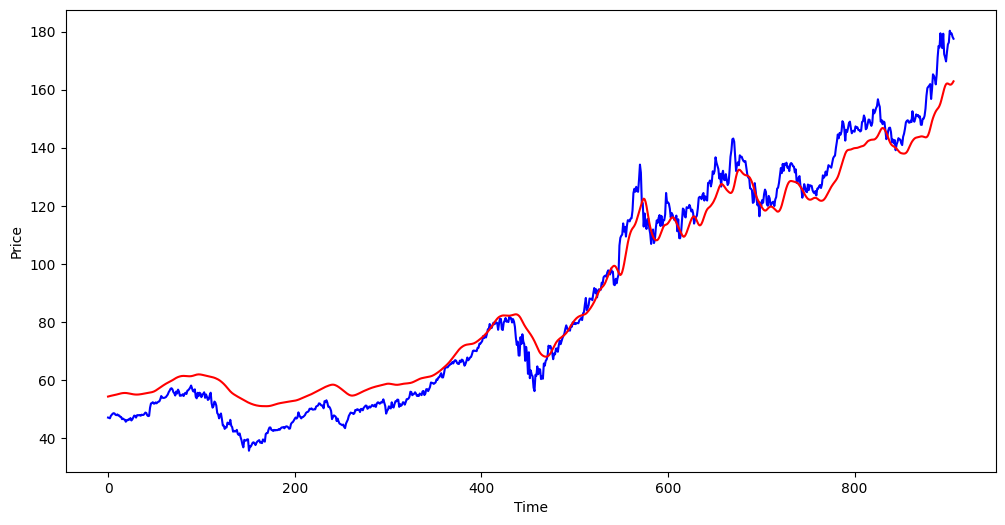

In [48]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')